## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

## Exploring the dataset

In [6]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [8]:
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
len(dataset_train.columns)

6

In [10]:
len(dataset_train)

1258

In [11]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [12]:
dataset_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [13]:
dataset_train.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### As we need only the 'Open' column, including only that in the training_set

In [14]:
training_set = dataset_train.iloc[:, 1:2].values

In [15]:
#Check
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

## Normalizing the rates

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
#Check
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## Creating a data structure with 60 timesteps and 1 output

In [18]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#### Resaping X_train

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN

### Importing the libraries

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initializing the RNN

In [21]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding the second LSTM layer and some Dropout regularisation

In [23]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding the third LSTM layer and some Dropout regularisation

In [24]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding the fourth LSTM layer and some Dropout regularisation

In [25]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [26]:
# Adding the output layer
regressor.add(Dense(units = 1))

### Compiling the RNN

In [27]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [28]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 112ms/step - loss: 0.0917
Epoch 2/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0057
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0038
Epoch 13/100

### Model Summary

In [29]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

## Importing the real stock prices

In [30]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

## Exploring the dataset

In [31]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [32]:
dataset_test.tail()

,Date,Open,High,Low,Close,Volume
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


In [33]:
dataset_test.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [34]:
len(dataset_test.columns)

6

In [35]:
len(dataset_test)

20

In [36]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [37]:
dataset_test.describe()

,Open,High,Low,Close
count,20.000000,20.000000,20.000000,20.000000
mean,807.526000,811.926500,801.949500,807.904500
std,15.125428,14.381198,13.278607,13.210088
min,778.810000,789.630000,775.800000,786.140000
25%,802.965000,806.735000,797.427500,802.282500
50%,806.995000,808.640000,801.530000,806.110000
75%,809.560000,817.097500,804.477500,810.760000
max,837.810000,841.950000,827.010000,835.670000


In [38]:
dataset_test.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## As we need only the 'Open' column, including only that in the test_set

In [40]:
real_stock_price = dataset_test.iloc[:, 1:2].values

## Predicting the stock prices using the RNN

In [41]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualizing the results

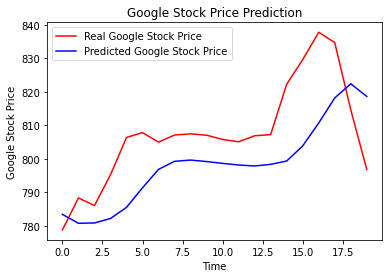

In [44]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Evaluating the Model

In [45]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [46]:
rmse

14.526338675942071